In [1]:
suppressMessages(library(Seurat))
suppressMessages(library(MuData))
suppressMessages(library(MultiAssayExperiment))
suppressMessages(library(WGCNA))
suppressMessages(library(hdWGCNA))

Warning message:
“package ‘S4Vectors’ was built under R version 4.3.2”
Warning message:
“package ‘BiocGenerics’ was built under R version 4.3.2”
Warning message:
“package ‘SummarizedExperiment’ was built under R version 4.3.2”
Warning message:
“package ‘MatrixGenerics’ was built under R version 4.3.2”
Warning message:
“package ‘GenomicRanges’ was built under R version 4.3.2”
Warning message:
“package ‘IRanges’ was built under R version 4.3.2”
Warning message:
“package ‘GenomeInfoDb’ was built under R version 4.3.2”
Warning message:
“package ‘Biobase’ was built under R version 4.3.2”


In [2]:
path_data = "/cellar/users/aklie/data/datasets/igvf_sc-islet_10X-Multiome/annotation/timecourse/A2_control/cellcommander/joint_integrate/joint_integrate.h5mu"

In [3]:
mdata <- readH5MU(path_data)
mdata

Warning message:
“sampleMap[['assay']] coerced with as.factor()”


A MultiAssayExperiment object of 2 listed
 experiments with user-defined names and respective classes.
 Containing an ExperimentList class object of length 2:
 [1] atac: SingleCellExperiment with 427234 rows and 15317 columns
 [2] rna: SingleCellExperiment with 36601 rows and 15317 columns
Functionality:
 experiments() - obtain the ExperimentList instance
 colData() - the primary/phenotype DataFrame
 sampleMap() - the sample coordination DataFrame
 `$`, `[`, `[[` - extract colData columns, subset, or experiment
 *Format() - convert into a long or wide DataFrame
 assays() - convert ExperimentList to a SimpleList of matrices
 exportClass() - save data to flat files

In [11]:
readRDS("/cellar/users/aklie/data/datasets/igvf_sc-islet_10X-Multiome/analysis/timecourse/A2_control/hdwgcna/metacells.rds")

An object of class Seurat 
36601 features across 6543 samples within 1 assay 
Active assay: RNA (36601 features, 0 variable features)

In [5]:
experiments(mdata)$rna

class: SingleCellExperiment 
dim: 36601 15317 
metadata(0):
assays(3): '' log1p_norm soupx_counts
rownames(36601): MIR1302-2HG FAM138A ... AC007325.4 AC007325.2
rowData names(1): sctransform_genes
colnames(15317): dm35a#TTTCACCCATGTGGGA-1 dm25a#GGCAATCGTTGTCCAT-1 ...
  dm25a#CTAAGTCAGGATTGCT-1 dm45a#GTCCGTAAGGGCTAAA-1
colData names(57): gex_barcode_cellranger atac_barcode_cellranger ...
  leiden_1 sample
reducedDimNames(3): X_seurat_default X_seurat_default_umap
  sctransform_scale_data
mainExpName: NULL
altExpNames(0):

In [6]:
counts <- assays(experiments(mdata)$rna)$counts
metadata <- as.data.frame(colData(mdata))

In [9]:
head(metadata)

,wnn_RNA_weight,wnn_ATAC_weight,wnn_leiden_1
,<dbl>,<dbl>,<fct>
dm35a#TTTCACCCATGTGGGA-1,0.5611538,0.43884623,4
dm25a#GGCAATCGTTGTCCAT-1,0.5026590,0.49734103,1
dm35a#GAGAACCAGAATCTCA-1,0.6935180,0.30648203,18
dm35a#GCTAGCCAGCTCCTAC-1,0.9513198,0.04868018,3
dm35a#AGAAAGGCAGGACCTT-1,0.6444803,0.35551975,7
dm25a#CTACTTAGTACCCACC-1,0.4864626,0.51353736,3


In [10]:
counts[1:5, 1:5]

NULL

In [7]:
adata <- Seurat::CreateSeuratObject(
    counts = counts, 
    meta.data = metadata
)

Warning message in CreateSeuratObject.default(counts = counts, meta.data = metadata):
“Some cells in meta.data not present in provided counts matrix”


ERROR: Error in CreateAssayObject(counts = counts, min.cells = min.cells, min.features = min.features, : No cell names (colnames) names present in the input matrix


In [23]:
colnames(adata@meta.data)

[1] "orig.ident"     "nCount_RNA"     "nFeature_RNA"   "celltype"      
 [5] "batch"          "Samplename"     "Site"           "DonorNumber"   
 [9] "Modality"       "VendorLot"      "DonorID"        "DonorAge"      
[13] "DonorBMI"       "DonorBloodType" "DonorRace"      "Ethnicity"     
[17] "DonorGender"    "QCMeds"         "DonorSmoker"

In [28]:
# Seurat guided clustering
adata <- Seurat::NormalizeData(adata)
adata <- Seurat::FindVariableFeatures(adata, selection.method = "vst", nfeatures = 2000)
adata <- Seurat::ScaleData(adata)
adata <- Seurat::RunPCA(adata, features = Seurat::VariableFeatures(adata))
adata <- Seurat::RunUMAP(adata, reduction = "pca", dims = 1:30)
adata <- Seurat::FindNeighbors(adata, dims = 1:30)
adata <- Seurat::FindClusters(adata, resolution = 0.5)

Centering and scaling data matrix

PC_ 1 
Positive:  ETV6, ELMO1, ERG, RNF220, AUTS2, AKT3, KCNQ5, NKAIN2, CELF2, MEIS1 
	   LRMDA, CALN1, VAV3, MED12L, FNBP1, ANGPT1, STXBP5, CHRM3, RNF130, ZNF385D 
	   AFF3, DAPK1, AL589693.1, LRRFIP1, ZNF521, DACH1, SOX4, INPP4B, ATP8B4, ALCAM 
Negative:  SPTA1, TSPAN5, CR1L, SNCA, JAZF1, SPTB, ALAS2, TRAK2, CA2, RHCE 
	   SLC22A23, EPB42, OSBP2, RHAG, BSG, FHDC1, GYPE, CA1, AHSP, TLN2 
	   HEMGN, HECTD4, SLC25A21, TLCD4, CPEB4, AC079804.3, MARCH3, DPF3, SELENBP1, NPL 
PC_ 2 
Positive:  IL1R1, ACSL6, TMCC2, PREX2, UBE2H, XPO7, RBPMS, PLCG1-AS1, LINC01122, FHDC1 
	   TCP11L2, AJ009632.2, DANT2, COL24A1, CALN1, ATP8B4, CHRM3, FLACC1, DMTN, RGS6 
	   MAN1A1, IL12A-AS1, FRMD4A, CLK3, SWT1, MIR99AHG, ADGRG6, MMRN1, SLC7A5, AC100835.2 
Negative:  LTBP1, MBOAT2, FAM13A, LINC01151, SLC25A21, ADAMTS3, DIAPH3, CENPF, RRM2, PTH2R 
	   BLM, S100A6, ACSBG1, ASPM, OLA1, MFSD4B, LINC01572, ERVMER61-1, LYST, CCDC26 
	   MGST3, NME7, UBE2S, CSNK2A1, HIST1H4C, GNL3, 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 123
Number of edges: 3731

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6928
Number of communities: 2
Elapsed time: 0 seconds


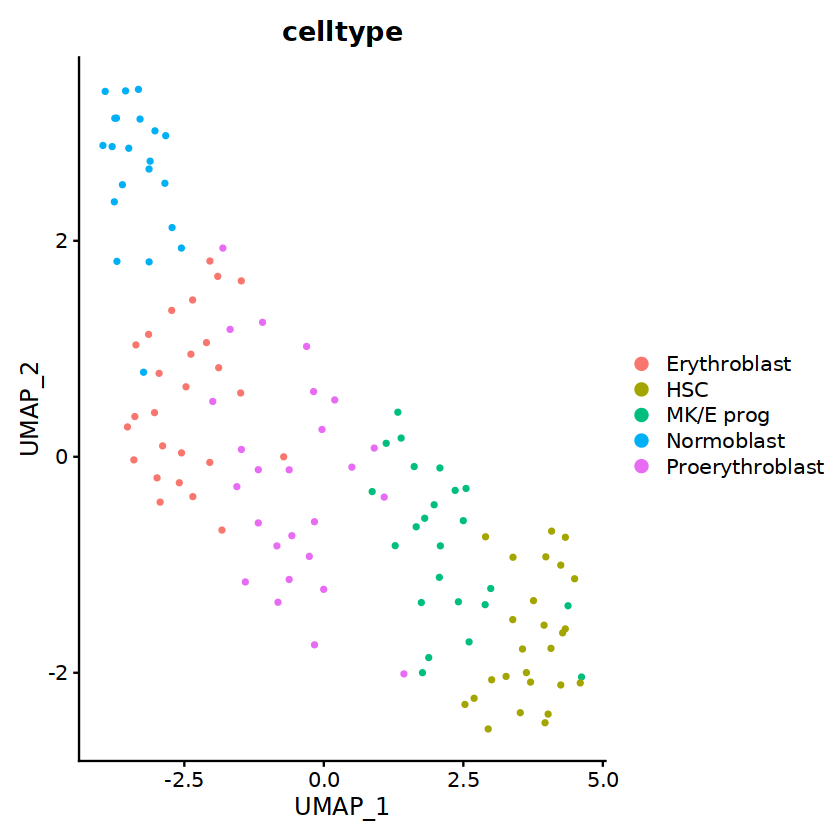

In [44]:
DimPlot(adata, group.by="celltype", reduction="umap", label=FALSE)

In [30]:
adata <- SetupForWGCNA(
    adata,
    gene_select = "fraction", # the gene selection approach
    fraction = 0.05, # fraction of cells that a gene needs to be expressed in order to be included
    wgcna_name = "test" # the name of the hdWGCNA experiment
)

In [35]:
adata <- MetacellsByGroups(
  seurat_obj = adata,
  group.by = c("celltype", "Samplename"), # specify the columns in adata@meta.data to group by
  reduction = "pca", # select the dimensionality reduction to perform KNN on
  k = 2, # nearest-neighbors parameter
  max_shared = 10, # maximum number of shared cells between two metacells
  min_cells = 2, # minimum number of cells in a metacell
  ident.group = "celltype", # set the Idents of the metacell seurat object
  assay="RNA",  # default
  slot="counts",  # default
)

Warning message in MetacellsByGroups(seurat_obj = adata, group.by = c("celltype", :
“Removing the following groups that did not meet min_cells: Normoblast#site2_donor5_multiome”


In [36]:
adata <- NormalizeMetacells(adata)

In [41]:
adata@misc$test$wgcna_metacell_obj

An object of class Seurat 
512 features across 122 samples within 1 assay 
Active assay: RNA (512 features, 0 variable features)